<a href="https://colab.research.google.com/github/dtatho/Block/blob/main/block.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Block/finished_data_official123.xlsx'
data = pd.read_excel(file_path)

In [ ]:
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['month'].astype(str), errors='coerce')


In [ ]:
data = data.fillna(method='ffill')  # Fill missing values forward

<ipython-input-29-e9f8dc47e7a1>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Fill missing values forward


In [ ]:
print(data.columns)

Index(['Country', 'Year', 'Time', 'month', 'GDP ', 'Gold ', 'Interest_rate',
       'Oil_price', 'Inflation', 'Unemployment_rate', 'Volume_ABT_USD',
       'Volume_BTC-USD', 'Volume_ETH-USD', 'Volume_USDT-USD', 'Volume_BNB-USD',
       'Volume_XRP-USD', 'Volume_DOGE-USD', 'Volume_ADA-USD',
       'Volume_LINK-USD', 'Volume_LTC-USD', 'Volume_BCH-USD', 'Volume_AVA-USD',
       'Volume_XLM-USD', 'Volume_POLY-USD', 'Volume_VET-USD', 'Volume_XTZ-USD',
       'Volume_EOS-USD', 'Volume_XMR-USD', 'Volume_ZEC-USD', 'Volume_DASH-USD',
       'Volume_ETC-USD', 'Volume_QTUM-USD', 'TimeIndex', 'Date'],
      dtype='object')


In [ ]:
!apt-get install r-base
!R -e "install.packages('gamlss')"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.3-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.

R version 4.4.3 (2025-02-28) -- "Trophy Case"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('gamlss')
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecif

In [ ]:
!pip install rpy2

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

In [ ]:
pandas2ri.activate()

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet


In [ ]:
data_model = data[['Date', 'Volume_POLY-USD']]
data_model.columns = ['ds', 'y']

In [ ]:
model = Prophet()
model.fit(data_model)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpezk6t2z_/ry9i03me.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpezk6t2z_/45i5g7ob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5850', 'data', 'file=/tmp/tmpezk6t2z_/ry9i03me.json', 'init=/tmp/tmpezk6t2z_/45i5g7ob.json', 'output', 'file=/tmp/tmpezk6t2z_/prophet_modelzg_qmjy_/prophet_model-20250318120947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
data_model['ds'] = pd.to_datetime(data_model['ds'])  # Ensure 'ds' column is in datetime format

<ipython-input-53-2ac117882414>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['ds'] = pd.to_datetime(data_model['ds'])  # Ensure 'ds' column is in datetime format


In [ ]:
data_model['ds'] = pd.to_datetime(data_model['ds'], errors='coerce')


<ipython-input-57-8613687d1cdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['ds'] = pd.to_datetime(data_model['ds'], errors='coerce')


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
print(data_model['ds'].dtype)  # Should be 'datetime64'


datetime64[ns]


In [ ]:
data_model['ds'] = pd.to_datetime(data_model['ds'], errors='coerce')


<ipython-input-69-8613687d1cdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['ds'] = pd.to_datetime(data_model['ds'], errors='coerce')


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpezk6t2z_/zrjsv_oo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpezk6t2z_/dey2ymld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71458', 'data', 'file=/tmp/tmpezk6t2z_/zrjsv_oo.json', 'init=/tmp/tmpezk6t2z_/dey2ymld.json', 'output', 'file=/tmp/tmpezk6t2z_/prophet_modelw7wsmgwt/prophet_model-20250318122121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

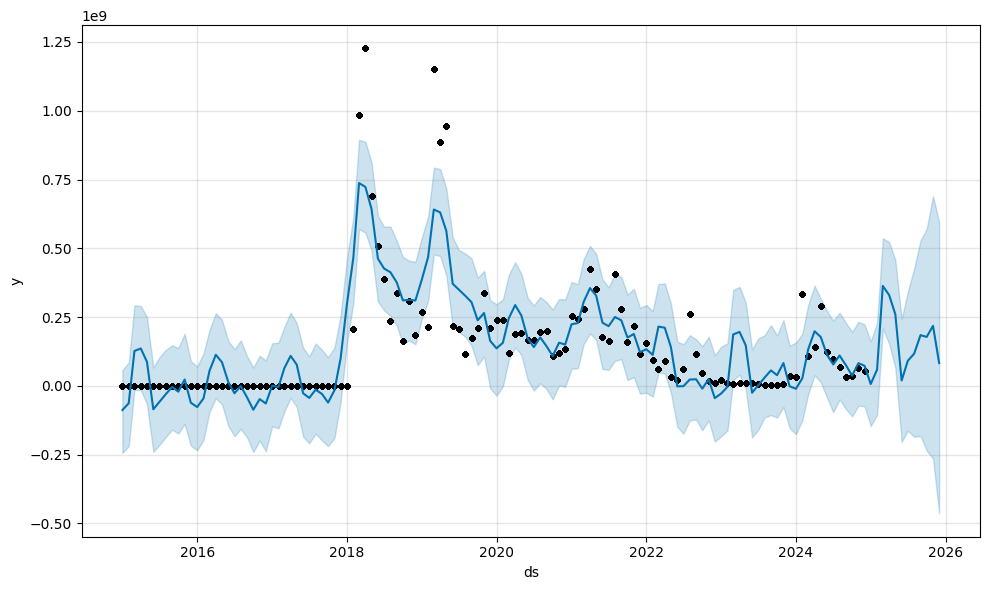

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare your data
data_model = data[['Date', 'Volume_POLY-USD']]  # Replace with your actual columns
data_model.columns = ['ds', 'y']  # Prophet expects 'ds' (date) and 'y' (target)

# Ensure 'ds' is in datetime format
data_model.loc[:, 'ds'] = pd.to_datetime(data_model['ds'], errors='coerce')  # Avoid SettingWithCopyWarning

# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(data_model)

# Create a dataframe for future predictions (forecasting 12 months ahead)
# Removed the 'data_model' argument, as Prophet infers the frequency from the fitted data
future = model.make_future_dataframe(periods=12, freq='M')  # 12 months ahead, monthly frequency

# Make predictions for the future
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.show()

In [ ]:
!pip install prophet
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip install --upgrade numpy scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pygam 0.9.1 requires scipy<1.12,>=1.11.1; python_version >= "3.9" and python_version < "3.13", but you have scipy 1.15.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have

In [ ]:
!pip uninstall numpy scipy
!pip install numpy
!pip install scipy

Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.2.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-6bb31eeb.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-2.2.4
Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scipy-1.15.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scipy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/scipy.libs/libquadmath-96973f99-

In [ ]:
!pip install numpy
!pip install scipy

In [ ]:
!pip install pygam

In [ ]:
import os
import numpy as np # Import numpy

numpy_strings_path = os.path.join(os.path.dirname(np.__file__), 'strings')
if not os.path.exists(numpy_strings_path):
  os.makedirs(numpy_strings_path)

with open(os.path.join(numpy_strings_path, '__init__.py'), 'w') as f:
  f.write('')

In [ ]:
!pip install numpy==1.26.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install scipy tensorflow numba

In [ ]:
!pip install pygam

In [ ]:
!rm /usr/local/lib/python3.11/dist-packages/numpy/strings/__init__.py

In [ ]:
!pip install --upgrade --force-reinstall numpy scipy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pygam 0.9.1 requires scipy<1.12,>=1.11.1; python_version >= "3.9" and python_version < "3.13", but you have scipy 1.15.2 which 

In [ ]:
!pip install --upgrade --force-reinstall pygam

  Using cached pygam-0.9.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached pygam-0.9.1-py3-none-any.whl (522 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.5 MB/s eta 0:00:00
Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
    

In [ ]:
from pygam import GAM

ImportError: cannot import name 'multiply' from 'numpy.strings' (/usr/local/lib/python3.11/dist-packages/numpy/strings/__init__.py)